In [240]:
using Distributions
using KernelDensity
using LinearAlgebra
using Optim
using QuadGK
using Random
using Roots
using StatsPlots
default(fmt=:png)

simpson_diversity_index(x) = 1 - dot(x, x) / sum(x)^2

sid_bayes(x) = 1 - (dot(x, x) + sum(x)) / (sum(x) * (sum(x) + 1))

function sehat_sdi(x)
    n = sum(x)
    √((4/n) * (sum(x->(x/n)^3, x) - sum(x -> (x/n)^2, x)^2))
end

function confint_sdi(x; α=0.05)
    D̂ = simpson_diversity_index(x)
    sehat = sehat_sdi(x)
    w = cquantile(Normal(), α/2)
    [D̂ - w*sehat, D̂ + w*sehat]
end

r(x) = round(x; sigdigits=3)

function plot_posterior(; data=[5, 5, 5, 5], κ=0, α=0.05, L=10^6, kwargs...)
    m = length(data)
    D̂ = simpson_diversity_index(data)
    confint_D = confint_sdi(data)
    prior_param = fill(κ, m)
    posterior = Dirichlet(data .+ prior_param)
    ptmp = zeros(m)
    D = [simpson_diversity_index(rand!(posterior, ptmp)) for _ in 1:L]
    credint_D = quantile.((D,), [α/2, 1-α/2])
    mean_D = mean(D)
    median_D = median(D)
    ik_D = InterpKDE(kde(D))
    mode_D = optimize(d -> -pdf(ik_D, d), minimum(D), maximum(D)).minimizer
    
    @show data
    @show prior_param

    density(D; label="posterior")
    plot!(credint_D, zeros(2); label="95% cred. int. = $(r.(credint_D))", lw=3)
    scatter!([mean_D], [0.0]; label="mean = $(r(mean_D))")
    scatter!([median_D], [0.0]; label="median = $(r(median_D))")
    scatter!([mode_D], [pdf(ik_D, mode_D)]; label="mode = $(r(mode_D))")
    plot!(confint_D, fill(-0.05pdf(ik_D, mode_D), 2); ls=:dash, 
        label="95% conf.int = $(r.(confint_D))", lw=3)
    scatter!([D̂], [-0.05pdf(ik_D, mode_D)]; label="sample SDI = $(r(D̂))")
    plot!(xguide="Simpson's diversity index", yguide="posterior density")
    plot!(; kwargs...)
    #title!("data=$data, prior=$prior_param")
end

plot_posterior (generic function with 1 method)

data = [5, 5, 5, 5]
prior_param = [0, 0, 0, 0]


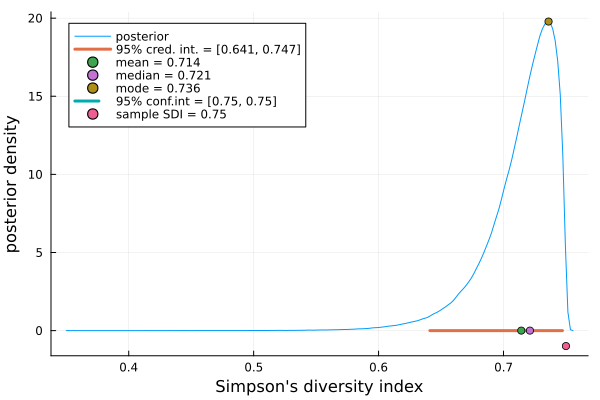

In [27]:
plot_posterior(data = [5, 5, 5, 5])

data = [1, 6]
prior_param = [0, 0]


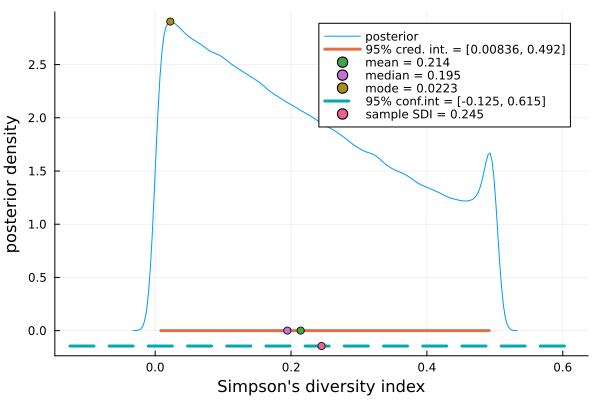

In [28]:
plot_posterior(data = [1, 6])

https://journals.asm.org/doi/10.1128/jcm.39.11.4190-4192.2001

data = [9, 8, 7, 6, 5, 5, 4, 4, 4, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
prior_param = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


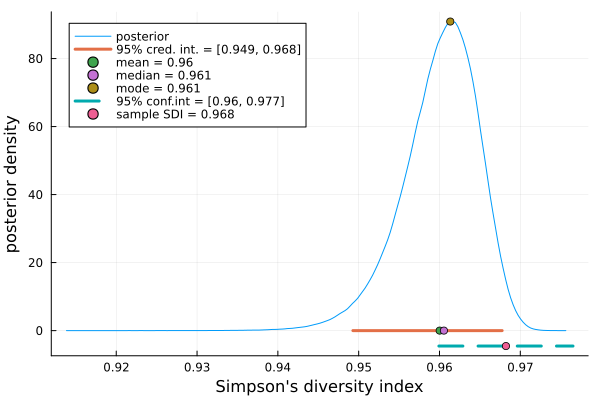

In [30]:
table1 = [9; 8; 7; 6; 5; 5; fill(4, 3); fill(3, 4); fill(2, 9); fill(1, 35)]
plot_posterior(data=table1, legend=:topleft)

data = [37, 5, 4, 4, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
prior_param = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


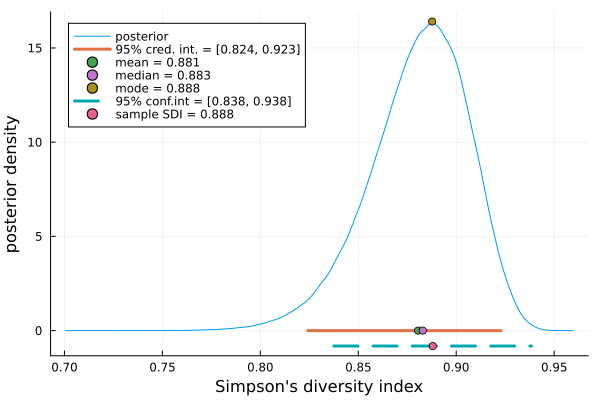

In [31]:
table2 = [37; 5; fill(4, 2); fill(3, 4); fill(2, 8); fill(1, 39)]
plot_posterior(data=table2)

data = [30, 13, 9, 8, 7, 7, 7, 6, 6, 5, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
prior_param = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


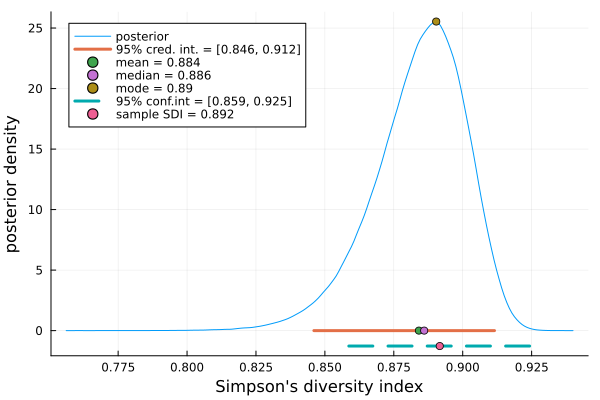

In [32]:
table3 = [30; 13; 9; 8; fill(7, 3); fill(6, 2); 5; fill(2, 3); fill(1, 13)]
plot_posterior(data=table3)

In [262]:
dist = Multinomial(sum(table1), table1/sum(table1))
μ = mean(dist)
k = params(Dirichlet(μ))[1]
sid_bayes(k)

0.9600173837461973

In [283]:
function pvalues_bayes(data, sid₀; κ=eps(), L=10^4)
    m = length(data)
    prior_param = fill(κ, m)
    posterior = Dirichlet(data .+ prior_param)
    Xtmp = rand(posterior)
    c = zeros(Int, length(sid₀))
    d = zeros(Int, length(sid₀))
    for i in 1:L
        X = rand!(posterior, Xtmp)
        sid = 1 - dot(X, X)
        @. c += sid ≤ sid₀
        @. d += sid ≥ sid₀
    end
    @. min(1, 2c/L, 2d/L)
end

function pvalue_bayes(data, sid₀; κ=eps(), L=10^4)
    m = length(data)
    prior_param = fill(κ, m)
    posterior = Dirichlet(data .+ prior_param)
    Xtmp = rand(posterior)
    c = 0
    d = 0
    for i in 1:L
        X = rand!(posterior, Xtmp)
        sid = 1 - dot(X, X)
        c += sid ≤ sid₀
        d += sid ≥ sid₀
    end
    min(1, 2c/L, 2d/L)
end

function sim_pval(dist::Multinomial; niters=10^4, κ=eps(), L=10^4)
    μ = mean(dist)
    sdi₀ = sid_bayes(μ)
    pval = zeros(niters)
    datatmp = [rand(dist) for _ in 1:Threads.nthreads()]
    Threads.@threads :static for i in 1:niters
        tid = Threads.threadid()
        data = rand!(dist, datatmp[tid])
        pval[i] = pvalue_bayes(data, sdi₀; κ, L)
    end
    pval
end

_ecdf(A, x) = count(≤(x), A) / length(A)

_ecdf (generic function with 1 method)

sidhat = simpson_diversity_index(data) = 0.9682226605303529
sidcheck = sid_bayes(data) = 0.9600173837461973
length(sid₀) = 100
  1.501204 seconds (12 allocations: 4.266 KiB)


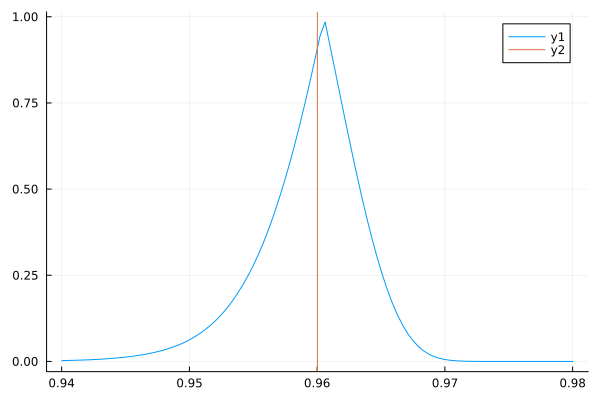

In [273]:
data = table1

@show sidhat = simpson_diversity_index(data)
@show sidcheck = sid_bayes(data)
sid₀ = range(sidcheck-0.02, sidcheck+0.02, 100)
@show length(sid₀)
@time pval = pvalues_bayes(data, sid₀; κ=eps(), L=10^6)
plot(sid₀, pval)
#vline!([sidhat])
vline!([sidcheck])

  6.757334 seconds (18.10 k allocations: 4.569 MiB, 0.17% gc time)


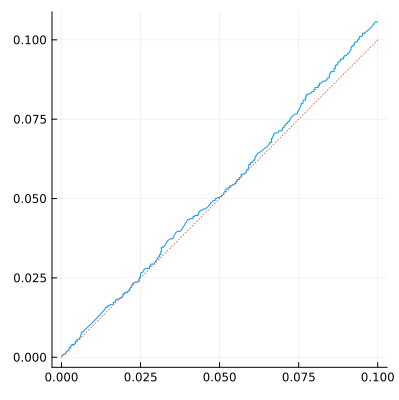

In [325]:
data = table1
dist = Multinomial(sum(data), data/sum(data))
@time pval = sim_pval(dist; κ=0.23, niters=3000)
plot(α -> _ecdf(pval, α), 0, 0.1; label="")
plot!(identity; label="", ls=:dot)
plot!(size=(400, 400))

  6.703628 seconds (18.10 k allocations: 4.570 MiB)


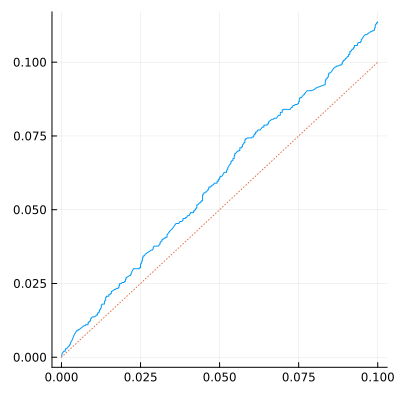

In [324]:
data = table2
dist = Multinomial(sum(data), data/sum(data))
@time pval = sim_pval(dist; κ=0.05, niters=3000)
plot(α -> _ecdf(pval, α), 0, 0.1; label="")
plot!(identity; label="", ls=:dot)
plot!(size=(400, 400))

  3.039662 seconds (18.09 k allocations: 2.369 MiB)


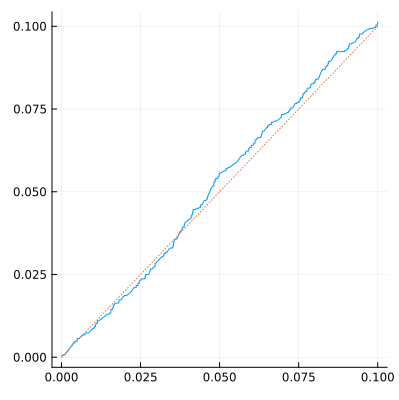

In [326]:
data = table3
dist = Multinomial(sum(data), data/sum(data))
@time pval = sim_pval(dist; κ=0.1, niters=3000)
plot(α -> _ecdf(pval, α), 0, 0.1; label="")
plot!(identity; label="", ls=:dot)
plot!(size=(400, 400))